# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses.

For this project, I'll be cleaning and then analyzing the data.

When analyzing I'll be looking to find out the following:

- Which movies have been seen by the highest number of people?
- Which movies are considered the best/worst?
- Which Characters are considered the best/worst?

# Read in the Data

In [1]:
# Import pandas and matplotlib modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

# Read Data into pandas dataframe
star_wars = pd.read_csv("star_wars.csv")


Ok, now that I have my data set stored in a data frame named 'star_wars' I can have a look to see what cleaning needs to be done and how I will answer my initial questions.

# Explore Data

In [2]:
# Show first 5 rows
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
#Description of each column
star_wars.describe(include="all")

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1.186000e+03,1187,837,674,572,551,608,759,739,836,837,836,837,837,837,830,832,832,824,826,815,827,821,813,828,831,822,815,827,829,829,214,1069,1047,1047,859,1037,1044
unique,NaN,3,3,1,1,1,1,1,1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,4,3,3,3,3,5,6,6,10
top,NaN,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,5,6,1,1,2,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very unfavorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,NaN,936,552,674,572,551,608,759,739,237,300,217,204,289,232,610,552,547,269,591,213,310,236,248,474,562,204,207,605,325,615,114,641,549,291,298,328,181
mean,3.290128e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.055639e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289451e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290147e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290814e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above I have had a look at the first 5 rows of the star wars data set and also a statistical description of the columns that I will be working with. The first column respondentID and is a unique number for each participant. There are some rows that do not have a respondent ID which I will remove.

The most noticible thing about the column names is that there are lot titles 'unnamed: (x)'. These refer to specific questions about Star Wars. The first set of unnamed columns are related to which of the movies respondents have seen. The second set refer to rankings of each movie and the third set are questions about individual characters.

I am going to rename the unnamed columns and then clean up the data in these columns because these are the columns I need to answer my questions. For the seen questions I will change the 'yes/no' format to True/false so that I can represent true and false and integers and therefore calculate the percentage of repsondents who have seen each movie. For the movie I need to change answers which state a movie title as true and then nan answers as false. Finally, for the movie characters I will change the favourably/ unfavourably format to integert values where 5 is the best rating and 1 is the worst.

# Data Cleaning

In [4]:
# Remove null Respondent IDs
star_wars = star_wars[star_wars['RespondentID'].notnull()]




# Rename columns
star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply."
                                     : "Episode_1", "Unnamed: 4": "Episode_2", "Unnamed: 5": "Episode_3", "Unnamed: 6": "Episode_4", 
                                     "Unnamed: 7": "Episode_5", "Unnamed: 8": "Episode_6"})

star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 
                                     "ep1_rank", 'Unnamed: 10': "ep2_rank", 'Unnamed: 11': "ep3_rank", 'Unnamed: 12': "ep4_rank", 'Unnamed: 13': "ep5_rank",
       'Unnamed: 14': "ep6_rank" })

star_wars = star_wars.rename(columns={
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"Han Solo", 
    "Unnamed: 16":"Luke Skywalker", "Unnamed: 17":"Princess Leia Organa", "Unnamed: 18":"Anakin Skywalker",	
    "Unnamed: 19":"Obi Wan Kenobi", "Unnamed: 20":"Emperor Palpatine", "Unnamed: 21":"Darth Vader", "Unnamed: 22":"Lando Calrissian",	
    "Unnamed: 23":"Boba Fett", "Unnamed: 24":"C-3P0", "Unnamed: 25":"R2 D2", "Unnamed: 26":"Jar Jar Binks",	"Unnamed: 27":"Padme Amidala", "Unnamed: 28":"Yoda"
})



# Dict to change repsonses to boolean values
mapping = {"Yes": True, "No": False}


# Dict to change movie ranking responses to Boolean Values
import numpy as np
mapping_rankings = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True}

# Dict to change character rating responses to Boolean Values
mapping_characters = {
    "Unfamiliar": np.nan,
    "Very unfavorably": 1,
    "Somewhat unfavorably": 2,
    "Neither favorably nor unfavorably (neutral)": 3,
    "Somewhat favorably": 4,
    "Very favorably": 5}



# Apply mapping dictionaries to dataset

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapping)

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(mapping_rankings)

for col in star_wars.columns[9:15]:
    star_wars[col] = star_wars[col].astype(float)
    
for cols in star_wars.columns[15:29]:
    star_wars[cols] = star_wars[cols].map(mapping_characters)


# Show first 5 rows of data set
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Episode_1,Episode_2,Episode_3,Episode_4,Episode_5,Episode_6,ep1_rank,ep2_rank,ep3_rank,ep4_rank,ep5_rank,ep6_rank,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Ok, my data is now cleaned as can be seen from the first 5 rows above. Now to move onto my analyis:

# Which Star Wars movies have been watched by the most people?

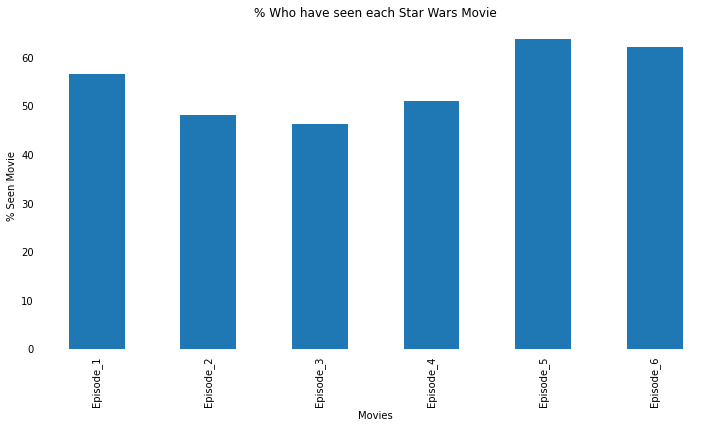

In [5]:
# Calculate percentage of people who have seen each movie
seen = star_wars[star_wars.columns[3:9]].sum() / len(star_wars) * 100

# Plot Bar Chart to visualize % who have seen each movie
ax = seen.plot.bar(figsize=(12,6))
ax.set_title("% Who have seen each Star Wars Movie")
ax.set_xlabel("Movies")
ax.set_ylabel("% Seen Movie")
ax.tick_params(left=False, bottom=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

The Star Wars movie that has been seen by the most people is Episode 5 *The Empire Strikes Back* followed closely by Episode 6 *Return of the Jedi*. This is unsurprising as they have both been out for nearly 40 years and have always been very popular among fans and critics.

The suprising thing here is that Episode 1 *The Phantom Menace* has been seen by more people than Episode 4 *A New Hope*. Now remember that Episode 4 is actually the first movie that was released. It is where the whole story started, so you would expect it to be the most watched. I'm not surprised that Episode 1 has been seen by a lot as it was released with a lot of hype but I am still surpised that it has been seen by more respondents than Episode 4 which I expected to have the highest percentage. 

**Let's dig into this a little deeper and see if there is a divide between those who replied to the survey saying they were Star Wars Fans and those who do not class themselves as fans.** 

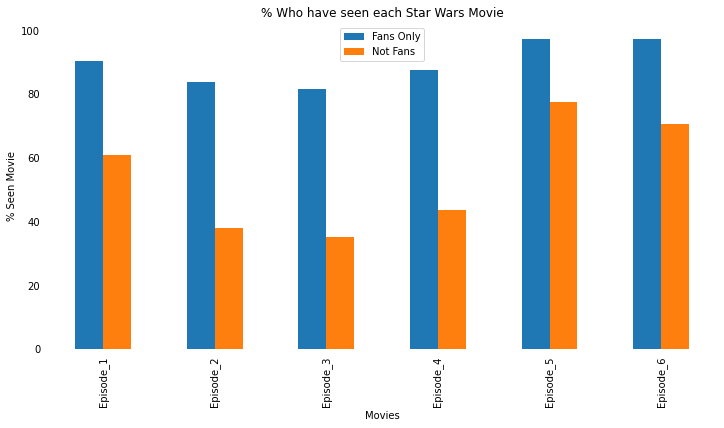

In [12]:
# Filter out fans and non fans
only_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "Yes"]
not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "No"]

# Calculate percentage of fans/non-fans who have seen each movie
seen_fans_percentage = only_fans[only_fans.columns[3:9]].sum() / len(only_fans) * 100
seen_not_fans_percentage = not_fans[not_fans.columns[3:9]].sum() / len(not_fans) * 100

# Plot Bar Chart to visualize
fans_non_fans_seen = pd.DataFrame({"Fans Only": seen_fans_percentage, "Not Fans": seen_not_fans_percentage})
plot = fans_non_fans_seen.plot.bar(y=["Fans Only", "Not Fans"], figsize=(12,6))
plot.set_title("% Who have seen each Star Wars Movie")
plot.set_ylabel("% Seen Movie")
plot.set_xlabel("Movies")
plot.tick_params(left=False, bottom=False)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["left"].set_visible(False)
plot.spines["bottom"].set_visible(False)

Unsurprisingly, fans have much higher percentages for each movie than non fans. Once again though I am a little suprised by Episode 4. I can't believe that there are roughly 10% of people who class themselves as Star Wars fans who have never seen the first movie in the story. It's like a fan of a book not reading the first chapter!

Anway, let's move on and see which movies our repsondents liked the most.

# Which Star Wars Movies are most popular?

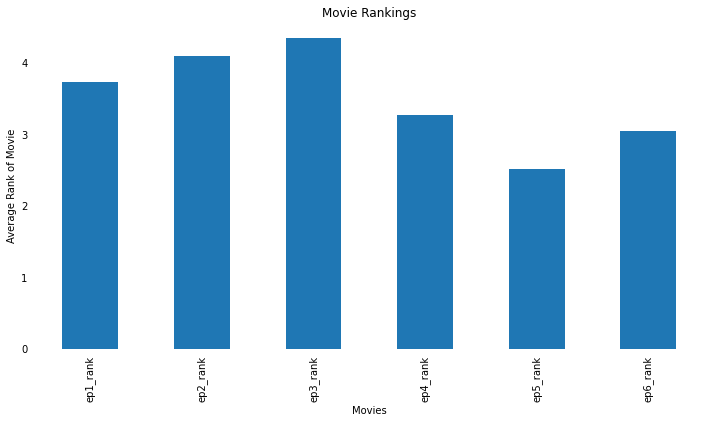

In [7]:
# Calculate average movie rankings
average = star_wars[star_wars.columns[9:15]].mean()

# Plot bar chart to visualize average movie rankings
plot = average.plot.bar(figsize=(12,6))
plot.set_title("Movie Rankings")
plot.set_ylabel("Average Rank of Movie")
plot.set_xlabel("Movies")
plot.tick_params(left=False, bottom=False)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["left"].set_visible(False)
plot.spines["bottom"].set_visible(False)

When answering the questions repsondents were asked to rate the movies from 1 (their favourite in the series) to 6 (their least favourite). Therefore the lower the average ranking the more highly it is actually rated. Therefore, Episode 5 is rated the highest followed by 4 and 6. This is unsurprising as Episode 5 *The Empire Strikes Back* is usually considered the best and the original trilogy (4-6) is nearly always considered superior to the prequal trilogy (1-3). Episode 3 is ranked the worst although I personally believe that is is better than 1 and 2.

**Let's see what our fans and non fans think:**

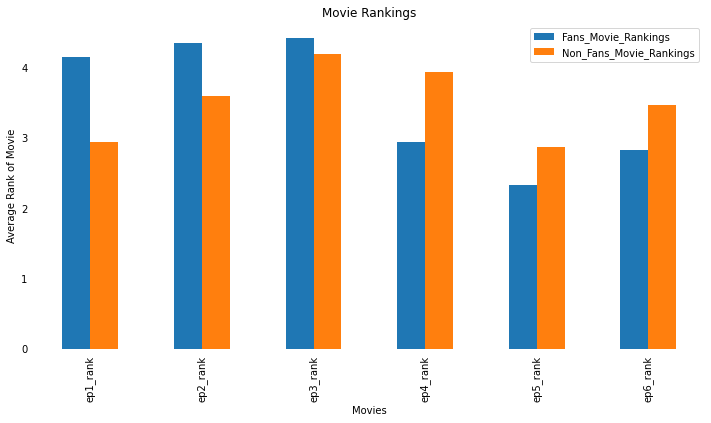

In [8]:
# Calculate average movie rankings for fans/ non-fans
average_fans = only_fans[only_fans.columns[9:15]].mean()
average_not_fans = not_fans[not_fans.columns[9:15]].mean()

# Plot bar chart to visualize average movie rankings
fans_not_fans_rank = pd.DataFrame({"Fans_Movie_Rankings": average_fans, "Non_Fans_Movie_Rankings": average_not_fans})
plot = fans_not_fans_rank.plot.bar(y=["Fans_Movie_Rankings", "Non_Fans_Movie_Rankings"], figsize=(12,6))
plot.set_title("Movie Rankings")
plot.set_ylabel("Average Rank of Movie")
plot.set_xlabel("Movies")
plot.tick_params(left=False, bottom=False)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["left"].set_visible(False)
plot.spines["bottom"].set_visible(False)

This is intersting. You will notice that the fans rate each of the prequal movies worse than non fans and they rate each of the original trilogy to be better than non fans do. Perhaps, this indicates a greater knowledge of Star Wars or perhaps people that don't care so much about Star Wars are more impressed by the visual effects in the prequal trilogy whereas the hardcore fans are more interested in the story and character development of the original trilogy. 

Speaking of characters. The third thing I will look at are the most popular characters. 

# Which Star Wars Characters are most popular?

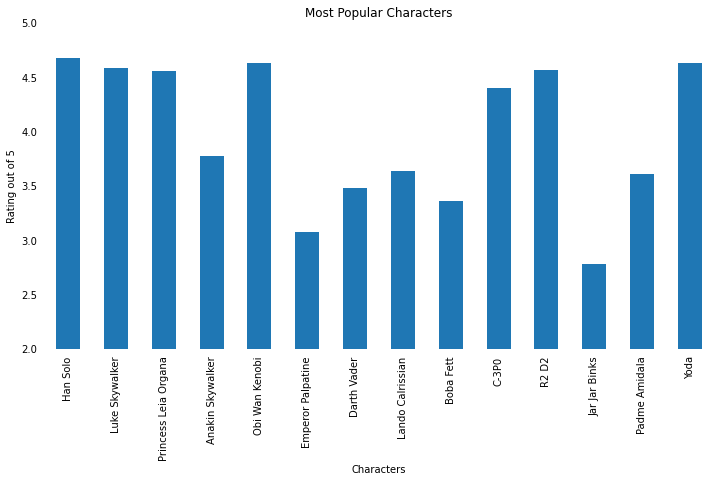

In [9]:
# Calculate average character rankings
character_ranks = star_wars[star_wars.columns[15:29]].mean()

# Plot bar chart for visaulaization
plot = character_ranks.plot.bar(figsize=(12,6))
plot.set_title("Most Popular Characters")
plot.set_ylabel("Rating out of 5")
plot.set_xlabel("Characters")
plot.set_ylim(2,5)
plot.tick_params(left=False, bottom=False)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["left"].set_visible(False)
plot.spines["bottom"].set_visible(False)

The big names sit at the top of the list here. Han, Luke, Leia, Obi Wan, C3PO, R2D2 and Yoda are all ranked much higher than the rest and are all on the good side in the orginal trilogy. Those characters who are ranked less favourably either come from the prequal trilogy like Anakin and Padme or they are Evil characters like Darth Vader or Palpatine. No surpise to see poor Jar Jar binks ranked at the bottom.

**Finally, let's see what the fans think.**

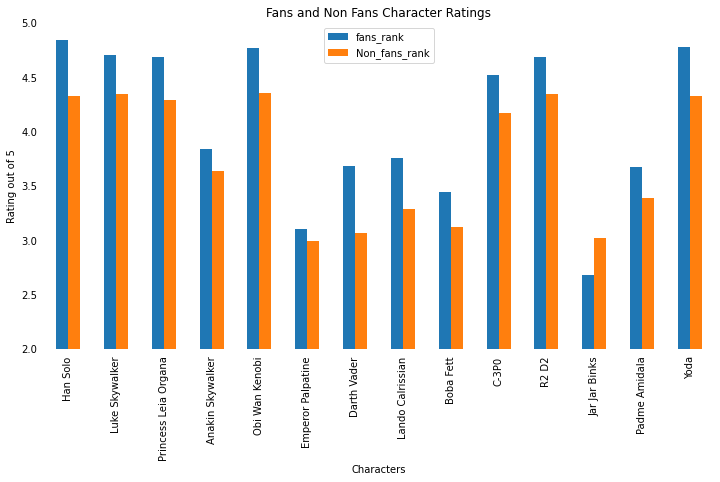

In [11]:
# Filter fan responses
new_only_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "Yes"]
new_not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == "No"]

# Average character rankings for fans and non fans
character_ranks_fans = new_only_fans[new_only_fans.columns[15:29]].mean()
character_ranks_not_fans = new_not_fans[new_not_fans.columns[15:29]].mean()

# Plot bar chart to visualize fan/non fan character rankings
fan_char_rank = pd.DataFrame({"fans_rank":character_ranks_fans, "Non_fans_rank":character_ranks_not_fans})
plot = fan_char_rank.plot.bar(y=['fans_rank', 'Non_fans_rank'], figsize=(12,6), ylim=(2,5))
plot.set_title("Fans and Non Fans Character Ratings")
plot.set_xlabel("Characters")
plot.set_ylabel("Rating out of 5")
plot.tick_params(left=False, bottom=False)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plot.spines["left"].set_visible(False)
plot.spines["bottom"].set_visible(False)

Fans and non fans alike have fairly similar thoughts about each character with fans more positive about each character except for one. The only character that non fans like more than fans do is Jar Jar Binks. I guess Star Wars fans really do hate him.

# Final Thoughts

- The movie that has been seen the most and is the most popular is *The Empire Strikes back*.
- The original trilogy are more popular than the prequal trilogy although *The Phantom Menace* has been seen by more people than *A new Hope*.
- The gap in popularity between the two trilogies is much larger amongst fans than non fans. Fans like the orginal trilogy a lot more than the prequal trilogy. 
- The most popular characters are the 'goodies' from the orginal trilogy whilst the 'baddies' and charaters from the prequal trilogy are less popular.
- Fans really hate Jar Jar Binks!
